# `FINAL PROJECT`

## **GAME ANALYSIS**

`Group ID`: 16

`Group Member`: 
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

## OVERVIEW OF THE PROJECT

1. Data
- Topic: Top-Grossing Steam Games in 2024 Analysis.
- Source of the data: [Top 1500 games on steam by revenue 09-09-2024](https://www.kaggle.com/datasets/alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024?fbclid=IwY2xjawF9_a9leHRuA2FlbQIxMAABHdX-MCoSjEUQ5nUxd9hS1YQEw4_VUAibpOZSuD0IWuGAmbE8wO4f7Ol9cw_aem_nXW-bKNT1rsRoEIfvtSw5Q) by [Kaggle](https://www.kaggle.com/)

2. Objectives
- Analyze movie data to uncover insights into the influence of factors release date, copies sold price, revenue, average playtime, review score, publisher class, publishers, developers on revenue
- Explore the relationship between game characteristics.

### IMPORT

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


### READ DATA

In [22]:
file_path = "Steam_2024_bestRevenue_1500.csv"
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='utf-8-sig')
    return data
data = read_data(file_path)

### HOW MANY ROWS AND HOW MANY COLUMNS?

In [23]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1500
Number of columns: 11


### THE MEANING OF EACH ROW

- Each row represents an individual game, and the columns provide details about the game's release, sales, price, revenue, average playtime, and ratings, along with information about the publisher and developer, steamID.

### DUPLICATED ROWS

In [24]:
def normalize_data(row):
    return row.apply(
        lambda x: str(sorted([str(v).strip().lower() for v in x])) if isinstance(x, list) 
        else str(x).strip().lower()
    )

normalized_df = data.apply(normalize_data, axis=1)

num_duplicated_rows = normalized_df.duplicated().sum()

if num_duplicated_rows > 0:
    duplicates = data[normalized_df.duplicated(keep=False)]
    print(f"The raw data has {num_duplicated_rows} duplicated rows.")
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated data found.")

No duplicated data found.


### THE MEANING OF EACH COLUMNS

- `name`: This column contains the name or title of the game.
- `releaseDate`: This column records the release date of the game. It is the date the game was officially made available to the public.
- `copiesSold`: This column represents the total number of copies of the game sold. This could refer to physical or digital copies.
- `price`: The price of the game when it was released.
- `revenue`: The total revenue generated from the sales of the game.
- `avgPlaytime`: This represents the average playtime of the game, often measured in hours.
- `reviewScore`: This column contains the average review score for the game.
- `publisherClass`: This indicates the classification of the publisher. It can be a general categorization such as "Indie," "AAA," or other types of publishers based on size, resources, and market reach.
- `publishers`: This column lists the name of the publisher of the game. Publishers are companies that manage the distribution and marketing of the game.
- `developers`: This column lists the names of the developers who created and worked on the game. 
- `steamId`: The unique identifier (ID) associated with the game on the Steam platform. 

### DATA TYPE OF EACH COLUMN

In [25]:
for column in data.columns:
    print(f"{column} | Data Type: {data[column].dtype}")

name | Data Type: object
releaseDate | Data Type: object
copiesSold | Data Type: int64
price | Data Type: float64
revenue | Data Type: float64
avgPlaytime | Data Type: float64
reviewScore | Data Type: int64
publisherClass | Data Type: object
publishers | Data Type: object
developers | Data Type: object
steamId | Data Type: int64


### ARE THESE COLUMNS HAVING INAPPROPRIATE DATA TYPES?

- Since all the columns's datatypes are `object`, we need to change into the appropriate datatypes: 
- `releaseDate`: This column should be `datetime`.
- `copiesSold`: This column should represent numeric data (`int` or `float`).
- `price`: This column should represent numeric data (`float`).
- `revenue`: This column should represent numeric data (`float`).
- `avgPlaytime`: This column should represent numeric data (`float`).
- `reviewScore`: This column should represent numeric data (`int` or `float`). 

In [26]:
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')  
data['copiesSold'] = pd.to_numeric(data['copiesSold'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['avgPlaytime'] = pd.to_numeric(data['avgPlaytime'], errors='coerce')
data['reviewScore'] = pd.to_numeric(data['reviewScore'], errors='coerce')
data['steamId'] = data['steamId'].astype('object')

### NEW DATATYPES OF EACH COLUMNS

In [27]:
data.dtypes

name                      object
releaseDate       datetime64[ns]
copiesSold                 int64
price                    float64
revenue                  float64
avgPlaytime              float64
reviewScore                int64
publisherClass            object
publishers                object
developers                object
steamId                   object
dtype: object

In [28]:
data_sorted = data.sort_values(by='price', ascending=True)
data_sorted

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
749,Sneak Out,2024-06-06,230771,0.00,4.289600e+04,7.538282,57,Indie,Kinguin,Kinguin Studios,2410490
590,Sword of Convallaria,NaT,236805,0.00,2.044690e+06,24.987157,73,Indie,XD,XD,2526380
1403,Banana,NaT,30739148,0.00,3.129158e+05,26.142054,85,Indie,Sky,"Sky,AestheticSpartan,O'Brian",2923300
1107,Dungeonborne,NaT,1121214,0.00,1.753880e+06,24.476678,66,Indie,Mithril Interactive,Mithril Interactive,2448970
1406,Sacred X：Heavens Wonderland,2024-09-05,33358,0.00,3.111270e+05,15.218052,77,Indie,Sacred X：Heavens Wonderland,Sacred X：Heavens Wonderland,2857890
...,...,...,...,...,...,...,...,...,...,...,...
1463,TEKKEN 8,NaT,734722,69.99,4.528511e+07,60.823722,71,AAA,Bandai Namco Entertainment,Bandai Namco Studios Inc.,1778820
48,EA SPORTS™ Madden NFL 25,NaT,50521,69.99,3.182368e+06,16.106491,50,AAA,Electronic Arts,Tiburon,2582560
1465,Persona 3 Reload,2024-01-02,612576,69.99,3.460186e+07,35.384946,95,AA,SEGA,ATLUS,2161700
1473,Like a Dragon: Infinite Wealth,NaT,369330,69.99,2.126522e+07,38.898038,91,AA,SEGA,Ryu Ga Gotoku Studio,2072450


In [29]:
data_sorted = data.sort_values(by='revenue', ascending=True)
data_sorted

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
1099,Memories Off #5 Togireta Film,NaT,1778,14.99,20674.0,7.263979,91,AA,"Spike Chunsoft Co., Ltd.",MAGES. Inc.,2184570
1098,Claw Machine Sim,NaT,3896,6.99,20723.0,2.884454,94,Indie,Unechte Sachen,Unechte Sachen,2456120
1097,DYSCHRONIA: Chronos Alternate - Dual Edition,NaT,725,34.99,20922.0,6.309180,92,Indie,IzanagiGames,"IzanagiGames,MyDearest Inc.",2023920
1096,Megacopter: Blades of the Goddess,NaT,1684,15.99,20946.0,3.630564,95,Indie,Pizza Bear Games,Pizza Bear Games,1228360
1095,Champion Shift,NaT,4526,6.99,20955.0,6.620099,79,Indie,SRG Studios,SRG Studios,2391900
...,...,...,...,...,...,...,...,...,...,...,...
1454,Dragon's Dogma 2,NaT,1785028,69.99,111478291.0,31.687050,0,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2054970
1453,Sons Of The Forest,NaT,8693478,29.99,217017892.0,17.341205,86,AA,Newnight,Endnight Games Ltd,1326470
1452,Palworld,NaT,16704850,29.99,392328553.0,41.840761,94,AA,Pocketpair,Pocketpair,1623730
1451,HELLDIVERS™ 2,2024-08-02,11905198,39.99,435635596.0,39.205960,71,AAA,PlayStation Publishing LLC,Arrowhead Game Studios,553850


### NUMERICAL VALUE

#### Value distributiion

The code above is designed to plot the distribution for all numerical columns in the dataset. Each column will be displayed separately with a distribution plot, allowing the user to observe the distribution of data across the numerical columns.

First, the code identifies all the columns with a numerical data type.  
Then, for each numerical column, it plots a histogram to show the frequency of the values in that column.  
The histogram is displayed with 15 bins to give a detailed view of the data distribution.

In [30]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("numerical columns:", numerical_cols)
numerical_stats = data[numerical_cols].describe().T
print("\nDescriptive Statistics:")
numerical_stats

numerical columns: ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
copiesSold,1500.0,1.414826e+05,1.132757e+06,593.0,4918.750000,11928.500000,37869.750000,3.073915e+07
price,1500.0,1.751951e+01,1.264661e+01,0.0,9.990000,14.990000,19.990000,9.999000e+01
revenue,1500.0,2.632382e+06,2.781024e+07,20674.0,45504.250000,109053.000000,455156.750000,8.377934e+08
avgPlaytime,1500.0,1.256270e+01,2.154217e+01,0.0,3.564848,6.762776,13.104473,2.963329e+02
reviewScore,1500.0,7.620133e+01,2.431944e+01,0.0,72.000000,83.000000,92.000000,1.000000e+02


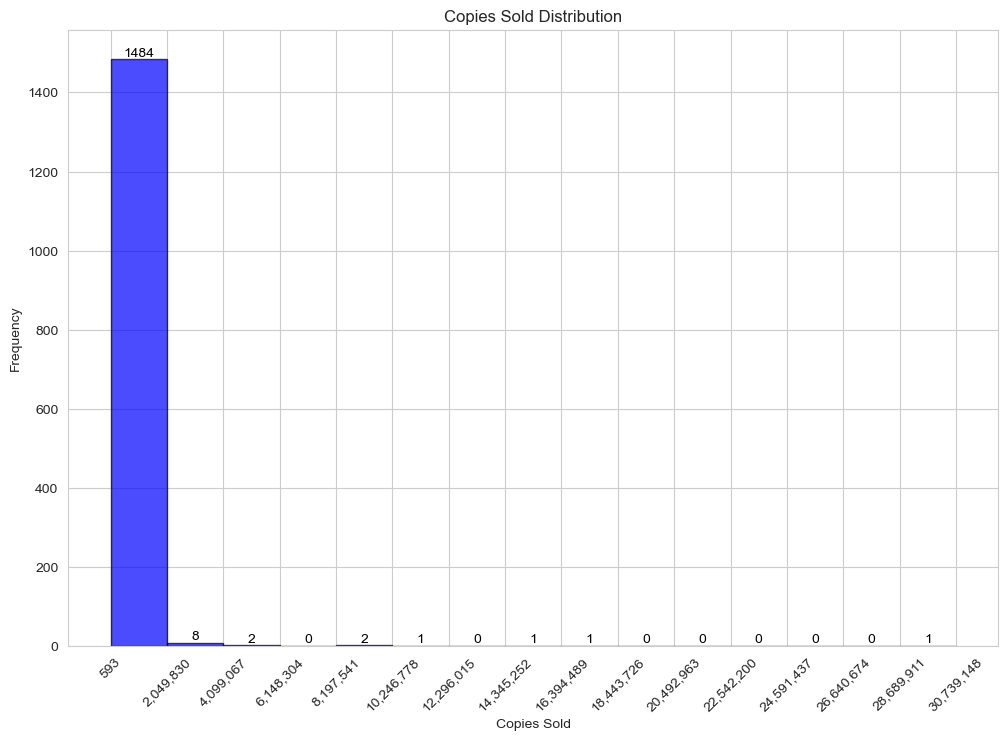

In [31]:
def format_number(x, _):
    return f"{int(x):,}"

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['copiesSold'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Copies Sold Distribution")
plt.xlabel("Copies Sold")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()


- The majority of values are concentrated in the very low range (near the first bin), indicating that most products have a very low number of copies sold compared to a few outliers.
- A few outliers are present in the far-right region of the chart, with very high values appearing infrequently.
- The first bin dominates the chart, with 1,484 occurrences, showing that most products have sold fewer than 2,049,830 copies.
- While there are some very high values (above 10,000,000), the number of products reaching such high sales is extremely rare, with only 1–2 occurrences.

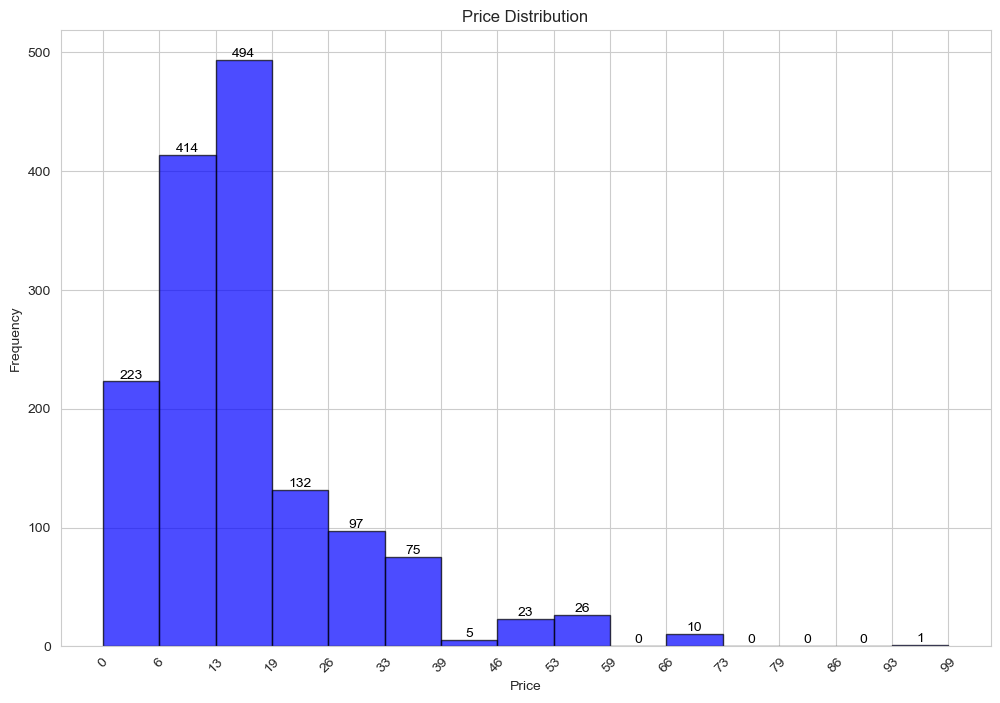

In [32]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['price'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- Most values are concentrated in the lower range (the first few bins), indicating that the majority of products have low prices, while only a few have higher prices.
- A few outliers are present on the far right of the chart, with very low frequency.
- The first bin dominates the chart, with 494 products, showing that most products are priced below 6$.
- The data extends to higher price ranges (above 60$), but the number of products reaching these prices is extremely rare, with only 1–10 products.

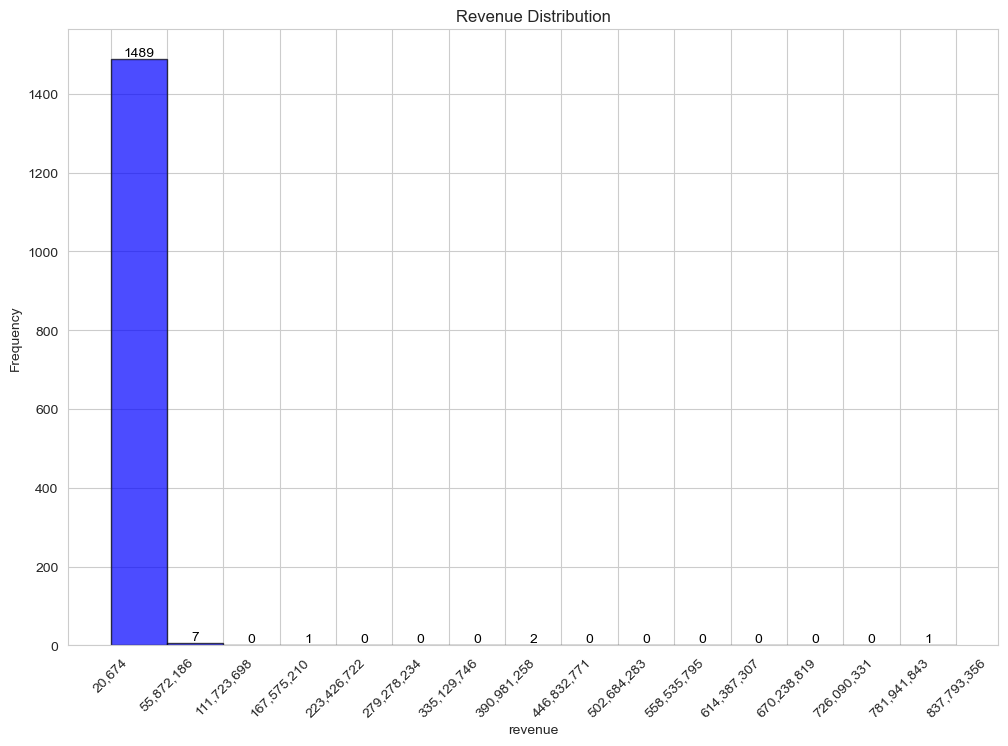

In [33]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['revenue'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Revenue Distribution")
plt.xlabel("revenue")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of values are concentrated in the first bin, indicating that most products generate very low revenue compared to a few outliers with extremely high revenue.
- There are a few extreme outliers with very high revenue, but their frequency is almost negligible compared to the majority.
- The first bin completely dominates the chart with 1,489 occurrences, showing that the vast majority of products generate revenue close to the lowest range.
- Products generating revenue in higher ranges (above 55,872,186) are extremely rare, with frequencies ranging from 0 to 7.

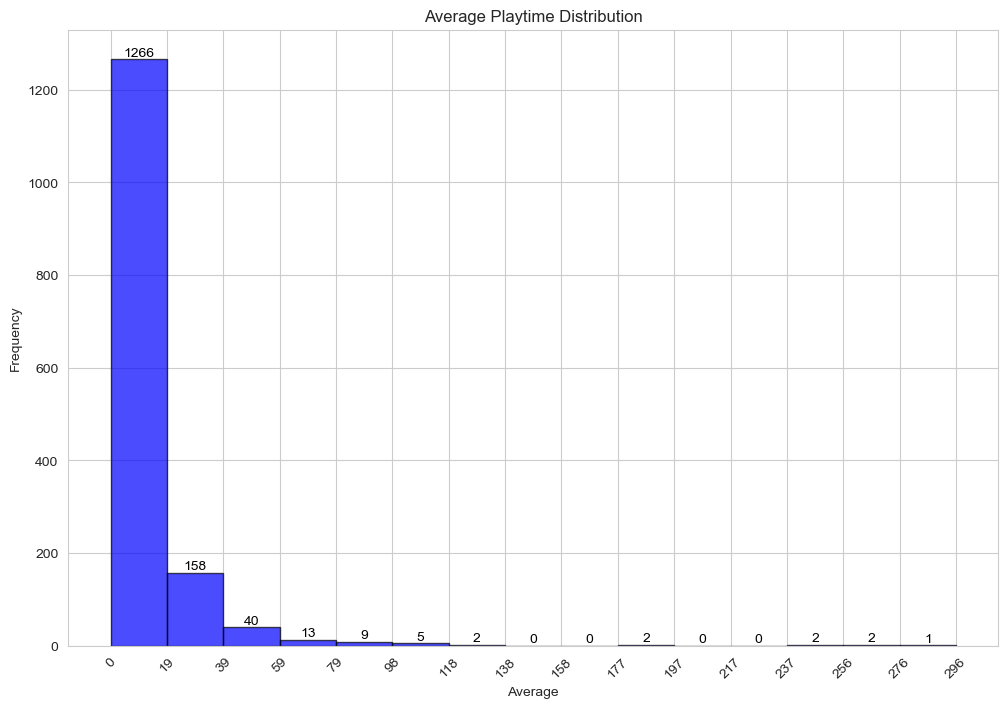

In [34]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['avgPlaytime'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Average Playtime Distribution")
plt.xlabel("Average")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of the values are concentrated in the first bin (average playtime 0-19 hours), with a frequency of 1,266. This indicates that most users spend a minimal amount of time playing.
- The frequency drops significantly in the subsequent bins. For example, only 158 users fall within the 19-39 hours range, and this trend continues with much smaller frequencies in higher bins.
- Instances of very high playtime (200+ hours) are extremely rare, with frequencies of only 1 or 2.
- The dataset suggests that users with low playtime overwhelmingly dominate, while those with medium to high playtime are significantly fewer.

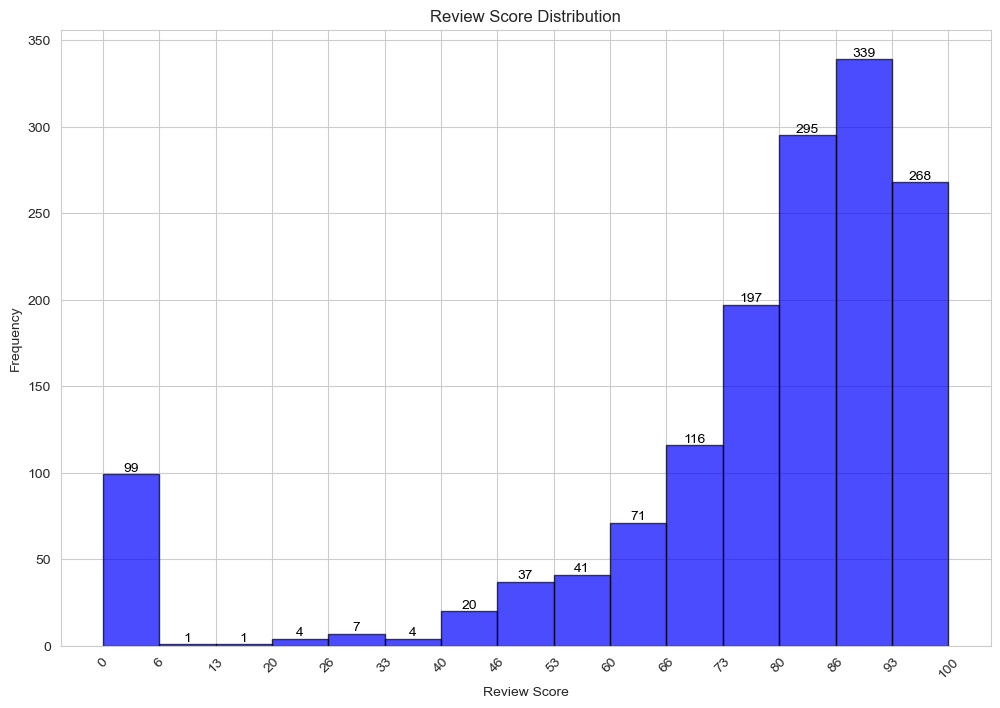

In [35]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['reviewScore'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of the values are concentrated in the highest review score range (80-100), with a peak frequency of 339. This suggests that most reviews are overwhelmingly positive.
- The frequency decreases as the review score lowers. For instance, the frequency drops to 197 for scores in the 70-80 range and continues to decline for lower bins.
- Extremely low review scores (0-20) are relatively rare, with frequencies ranging from 1 to 99, indicating that very negative reviews are uncommon.
- The dataset demonstrates that positive review scores dominate, while neutral and negative scores are significantly less frequent.

#### Missing value

Calculate ratio of missing values by selecting numerical columns, checking for missing values (NaN), calculating the percentage of missing values

In [36]:
missing_values = data[numerical_cols].isnull().mean() * 100
missing_values

copiesSold     0.0
price          0.0
revenue        0.0
avgPlaytime    0.0
reviewScore    0.0
dtype: float64

#### Abnormal

- First, we calculate basic values for each numerical column, including the minimum value, maximum value, the 25th percentile (Q1), and the 75th percentile (Q3).
- The distance between the 75th and 25th percentiles (IQR) helps determine the spread of the data.
- Based on the IQR, we calculate the lower and upper boundaries using the formulas:
    - Lower Bound = Q1 - 1.5 * IQR
    - Upper Bound = Q3 + 1.5 * IQR
- Values that fall outside these boundaries are considered outliers. Specifically, if the minimum value in the column is less than the lower bound or the maximum value is greater than the upper bound, they are identified as outliers.

In [37]:
outlier_results = {}

for col in numerical_cols:
    min_val = data[col].min()
    max_val = data[col].max()

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    is_min_outlier = min_val < lower_lim
    is_max_outlier = max_val > upper_lim

    outlier_results[col] = {
        "Min": min_val,
        "Max": max_val,
        "Lower Limit": lower_lim,
        "Upper Limit": upper_lim,
        "Is Min Outlier": is_min_outlier,
        "Is Max Outlier": is_max_outlier,
    }

outlier_df = pd.DataFrame(outlier_results).T
outlier_df


,Min,Max,Lower Limit,Upper Limit,Is Min Outlier,Is Max Outlier
copiesSold,593,30739148,-44507.75,87296.25,False,True
price,0.0,99.99,-5.01,34.99,False,True
revenue,20674.0,837793356.0,-568974.5,1069635.5,False,True
avgPlaytime,0.0,296.332852,-10.744591,27.413912,False,True
reviewScore,0,100,42.0,122.0,True,False


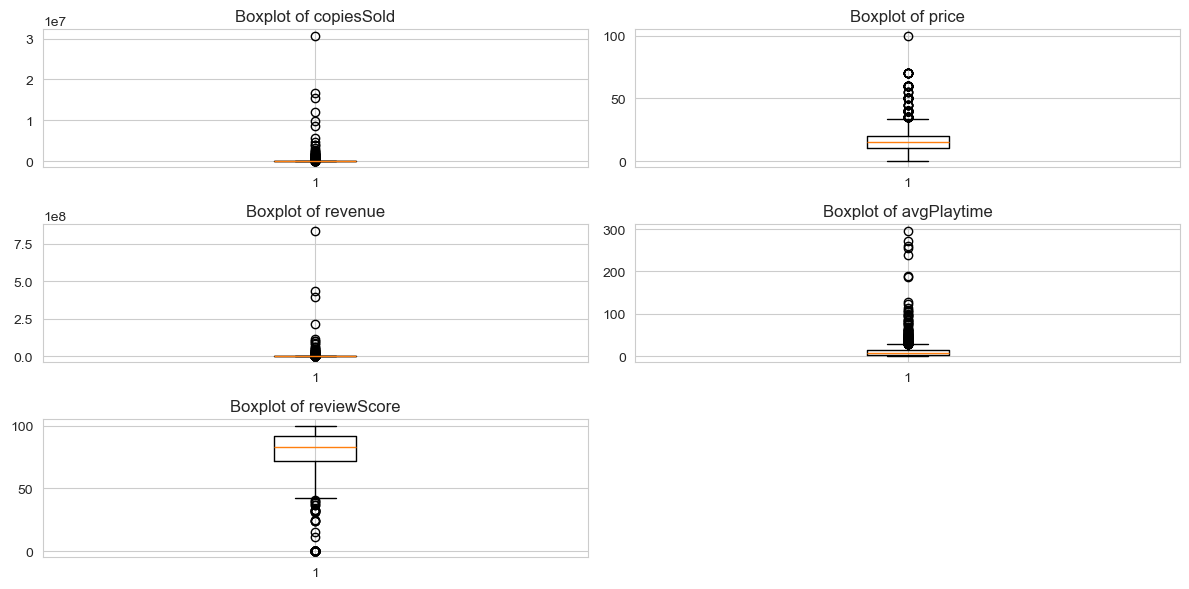

In [45]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(x=data[col])
    axes[i].set_title(f'Boxplot of {col}') 

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

Observing the charts, we can see that there are many outliers. To ensure that no valuable information is removed or bias is introduced, we have decided not to remove the outliers.